<a href="https://colab.research.google.com/github/RyuJungSoo/2022_winter_ai_study/blob/main/%EC%B9%98%EB%A7%A4_%ED%99%98%EC%9E%90%EC%9D%98_%EB%87%8C%EC%9D%B8%EC%A7%80_%EC%9D%BC%EB%B0%98%EC%9D%B8%EC%9D%98_%EB%87%8C%EC%9D%B8%EC%A7%80_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 준비
from google.colab import files
uploaded = files.upload()

# colab > run_project 폴더에 있는 colab_train_test.zip 파일을 선택합니다. (코랩 content 폴더에 압축이 풀린 파일들이 업로드됨)
# 280개의 이미지 중 160개는 train 폴더에, 120개는 test 폴더에 있음 (치매 환자의 뇌 사진은 ad, 일반인의 뇌 사진은 normal)
my_data = 'colab_train_test.zip'
!unzip colab_train_test.zip

Saving colab_train_test.zip to colab_train_test.zip
Archive:  colab_train_test.zip
   creating: test/ad/
  inflating: test/ad/ad_test_1.jpg   
  inflating: test/ad/ad_test_10.jpg  
  inflating: test/ad/ad_test_11.jpg  
  inflating: test/ad/ad_test_12.jpg  
  inflating: test/ad/ad_test_13.jpg  
  inflating: test/ad/ad_test_14.jpg  
  inflating: test/ad/ad_test_15.jpg  
  inflating: test/ad/ad_test_16.jpg  
  inflating: test/ad/ad_test_17.jpg  
  inflating: test/ad/ad_test_18.jpg  
  inflating: test/ad/ad_test_19.jpg  
  inflating: test/ad/ad_test_2.jpg   
  inflating: test/ad/ad_test_20.jpg  
  inflating: test/ad/ad_test_21.jpg  
  inflating: test/ad/ad_test_22.jpg  
  inflating: test/ad/ad_test_23.jpg  
  inflating: test/ad/ad_test_24.jpg  
  inflating: test/ad/ad_test_25.jpg  
  inflating: test/ad/ad_test_26.jpg  
  inflating: test/ad/ad_test_27.jpg  
  inflating: test/ad/ad_test_28.jpg  
  inflating: test/ad/ad_test_29.jpg  
  inflating: test/ad/ad_test_3.jpg   
  inflating: test/ad/

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [3]:
np.random.seed(3)
tf.random.set_seed(3)

train_datagen = ImageDataGenerator(rescale=1./255, # 원본 영상이 0~255의 RGB 값을 가지고 있으므로 255로 나누면 0~1의 값으로 변환되어 학습이 좀 더 빠르고 쉬워짐
                                   horizontal_flip=True, # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                   width_shift_range = 0.1, # 전체 크기의 10% 범위에서 좌우로 이동
                                   height_shift_range=0.1, # 마찬가지로 위아래로 이동
                                   #rotation_range=5, # 정해진 각도만큼 이미지를 회전
                                   #shear_range=0.7, # 좌표 하나를 고정시키고 다른 몇 개의 좌표를 이동시키는 변환을 함
                                   #zoom_range=[0.9, 2.2], # 정해진 범위 안에서 축소 또는 확대
                                   #vertical_flip=True, # 수직 대칭 이미지를 50% 확률로 만들어 추가
                                   fill_mode='nearest') # 이미지를 축소 또는 회전하거나 이동할 때 생기는 빈 공간을 어떻게 채울지 결정(nearest - 가장 비슷한 색으로 채우기)

In [4]:
# train 이미지 불러오기
train_generator = train_datagen.flow_from_directory('train', target_size=(150,150), batch_size=5, class_mode='binary') 

Found 160 images belonging to 2 classes.


In [5]:
# 테스트셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale=1./255)

# test 이미지 불러오기
test_generator = test_datagen.flow_from_directory('test', # 테스트셋이 있는 폴더 위치
                                                  target_size=(150, 150),
                                                  batch_size=5,
                                                  class_mode='binary')

Found 120 images belonging to 2 classes.


In [6]:
# 앞서 배운 CNN 모델을 만들어 적용하기
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))



In [7]:
#모델을 컴파일 합니다. 
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

#모델을 실행합니다(fit()이 아니라 fit_generator()를 써야 함!)
history = model.fit_generator(
       train_generator, # 앞서 만들어진 train_generator를 학습 모델로 사용
       steps_per_epoch=30,  # 이미지 생성기에서 몇 개의 샘플을 뽑을지 결정 (적절한 값으로 조절합니다.)
       epochs=50,   # 몇 번 반복학습할 것인지 결정 (적절한 값으로 조절합니다.)
       validation_data=test_generator, # 앞서 만들어진 test_generator를 테스트셋으로 사용
       validation_steps=10 # 정지 전 검증할 단계(샘플 배치)의 총 개수)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
30/30 [==============================] - 4s 39ms/step - loss: 0.7068 - accuracy: 0.4600 - val_loss: 0.6928 - val_accuracy: 0.4800
Epoch 2/50
30/30 [==============================] - 1s 33ms/step - loss: 0.6920 - accuracy: 0.5467 - val_loss: 0.6901 - val_accuracy: 0.6600
Epoch 3/50
30/30 [==============================] - 1s 32ms/step - loss: 0.6922 - accuracy: 0.5867 - val_loss: 0.6859 - val_accuracy: 0.6000
Epoch 4/50
30/30 [==============================] - 1s 33ms/step - loss: 0.6814 - accuracy: 0.6600 - val_loss: 0.6729 - val_accuracy: 0.6000
Epoch 5/50
30/30 [==============================] - 1s 33ms/step - loss: 0.6792 - accuracy: 0.6067 - val_loss: 0.6551 - val_accuracy: 0.5600
Epoch 6/50
30/30 [==============================] - 1s 33ms/step - loss: 0.6775 - accuracy: 0.5800 - val_loss: 0.6380 - val_accuracy: 0.7800
Epoch 7/50
30/30 [==============================] - 1s 32ms/step - loss: 0.6485 - accuracy: 0.6333 - val_loss: 0.6166 - val_accuracy: 0.7200
Epoch 8/50
30

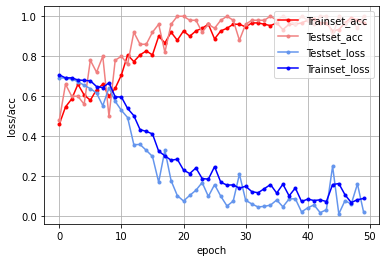

In [8]:
#결과를 그래프로 표현하는 부분입니다.
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))  
plt.plot(x_len, acc, marker='.', c="red", label='Trainset_acc')
plt.plot(x_len, val_acc, marker='.', c="lightcoral", label='Testset_acc')
plt.plot(x_len, y_vloss, marker='.', c="cornflowerblue", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right') 
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()